                    precision    recall  f1-score   support

              Ally       0.44      0.53      0.48        32
            Herald       0.52      0.56      0.54        25
              Hero       0.33      0.17      0.22         6
            Mentor       0.00      0.00      0.00         2
            Shadow       0.00      0.00      0.00         5
      Shapeshifter       0.00      0.00      0.00         3
Threshold Guardian       0.33      0.14      0.20         7
         Trickster       0.29      0.22      0.25         9

          accuracy                           0.39        89
         macro avg       0.24      0.20      0.21        89
      weighted avg       0.38      0.39      0.38        89



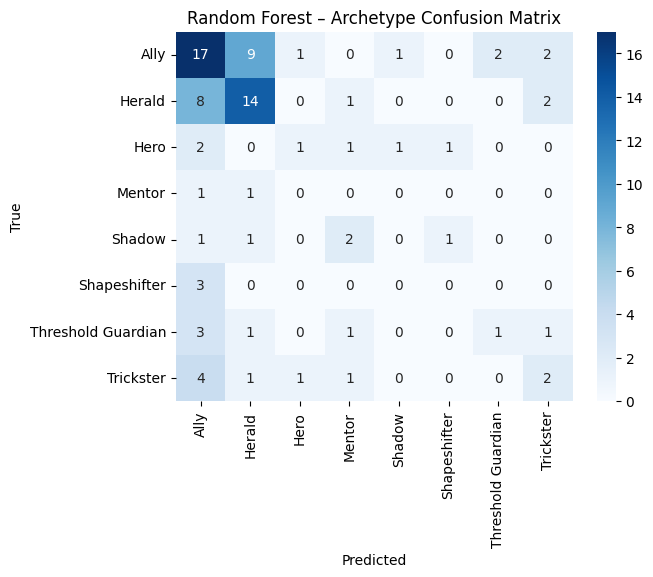

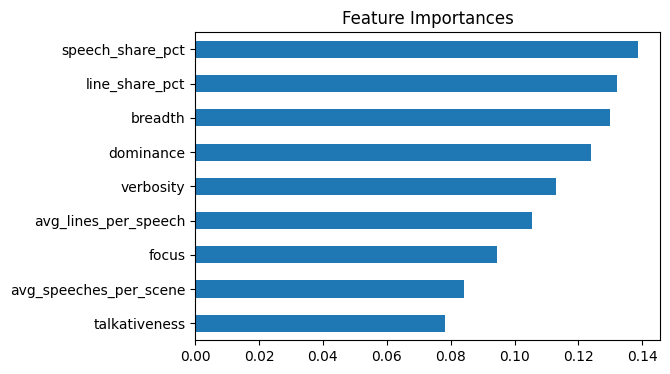

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)

character_df = pd.read_csv('../csv/all_plays_char_stats.csv')
archetype_df = pd.read_csv('../csv/all_char_archetypes.csv')

character_df = pd.merge(left=character_df, right=archetype_df, on=['character', 'play'], how='inner')

# character_df = character_df[character_df['role_type'] == 'main']

feature_cols = [
    "speech_share_pct", "line_share_pct", "avg_speeches_per_scene", "avg_lines_per_speech",
    "verbosity", "talkativeness", "dominance", "focus", "breadth"

]

X = character_df[feature_cols].fillna(0)
y = character_df['campbell_archetype']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Random Forest – Archetype Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

importances = pd.Series(rf.feature_importances_, index=feature_cols)
importances.sort_values().plot(kind='barh', title='Feature Importances', figsize=(6,4))
plt.show()

In [ ]:
print(character_df['campbell_archetype'].value_counts())


campbell_archetype
Ally                  105
Herald                 83
Trickster              29
Threshold Guardian     22
Hero                   20
Shadow                 16
Shapeshifter           11
Mentor                  8
Name: count, dtype: int64
